# Adult income Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields The dataset contains 16 columns Target filed: Income -- The income is divide into two classes: <=50K and >50K 
Number of attributes: 14 -- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math
from collections import Counter, defaultdict
from functools import partial


   age         workclass  fnlwgt     education  educational-num  \
0  age         workclass  fnlwgt     education  educational-num   
1   25           Private  226802          11th                7   
2   38           Private   89814       HS-grad                9   
3   28         Local-gov  336951    Assoc-acdm               12   
4   44           Private  160323  Some-college               10   
5   18                 ?  103497  Some-college               10   
6   34           Private  198693          10th                6   
7   29                 ?  227026       HS-grad                9   
8   63  Self-emp-not-inc  104626   Prof-school               15   
9   24           Private  369667  Some-college               10   

       marital-status         occupation   relationship   race  gender  \
0      marital-status         occupation   relationship   race  gender   
1       Never-married  Machine-op-inspct      Own-child  Black    Male   
2  Married-civ-spouse    Farming-fishing

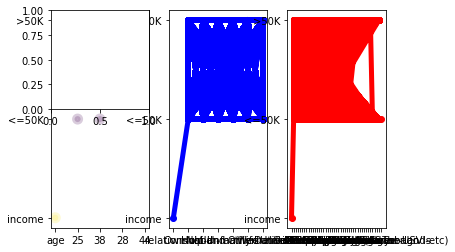

In [29]:
df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
                 'occupation', 'relationship', 'race', 'gender', 'capital-gain','capital-loss', 'hours-per-week',
                 'native-country', 'income'])
print(df.head(10))
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax4 = fig.add_subplot(231)

Y = df['income']
label = LabelEncoder()
Y = label.fit_transform(Y)

ax1.scatter((df['age'])[:5],(df['income'])[:5], alpha=0.2, 
            c=Y[:5], marker='o', linewidth=5)
ax2.plot(df['relationship'], df['income'], color='b', marker='o', linewidth=5)
ax3.plot(df['native-country'], df['income'], color='r', marker='o', linewidth=5)


plt.show()







# Preprocessing data

In [5]:
#print(df.shape)
df.dropna(0, inplace=True)
print(df.shape)
df.head()
df = df[['age', 'workclass', 'education', 'occupation', 'race', 'gender', 'income']]

print('Original Features: ', list(df.columns))
data_dummies = pd.get_dummies(df)
print('Features after One-Hot Encoding: \n', list(data_dummies.columns))
print(data_dummies)


(48843, 7)
Original Features:  ['age', 'workclass', 'education', 'occupation', 'race', 'gender', 'income']
Features after One-Hot Encoding: 
 ['age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_89', 'age_90', 'age_age', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Privat

In [6]:
features = data_dummies.loc[:, 'age_17':'occupation_Transport-moving']
X = features.values
y = data_dummies['income_>50K']
print(y.head())
print(X)

0    0
1    0
2    0
3    1
4    1
Name: income_>50K, dtype: uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Employing models

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
print('Accuracy: {}'.format((TN+TP)/(TN+TP+FN+FP)))
print('Precision: {}'.format(TP/(TP + FP)))
print('Recall: {}'.format(TP/(TP+FN)))




Accuracy: 0.7998771624526564
Precision: 0.6374918354016982
Recall: 0.4107744107744108


In [8]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
print('Accuracy: {}'.format((TN+TP)/(TN+TP+FN+FP)))
print('Precision: {}'.format(TP/(TP + FP)))
print('Recall: {}'.format(TP/(TP+FN)))

Accuracy: 0.7904596171563107
Precision: 0.6196363636363637
Recall: 0.35858585858585856


# Building my Own Decision Tree Classifier

Decision Trees can handle both categorical and numerical data

In [9]:
df = df[['age', 'workclass', 'education', 'occupation', 'race', 'gender', 'income']]
X = df[['age', 'workclass', 'education', 'occupation', 'race', 'gender']]
y = df.income

In decision trees, it is optimal to choose questions which give us a lot of information for what the tree should predict. Capturing this notion of "how much information" with entropy. 

Imagein that we have a set S of data, each member of which is labeled as belonging to one of a finite of classes, $C_{1}$,...$C_{n}$. If all the data points belong to a single class, then there is no real uncertainty, which means we'd like there to be low entropy. If the data points are evenly spread across the classes, thee is a lot of uncertainty and we'd like there to be high entropy

In math terms, if $p_{i}$ is the proportion of data labeled as class $c_{i}$, we define the entropy as:
H(S) = -$p_{1}$$log_{2}$$p_{1}$-...-$p_{n}$$log_{2}$$p_{n}$

In [3]:
#Data is in the form of (input, label)
def entropy(class_probs):
    return sum(-p*math.log(p,2)
              for p in class_probs
              if p)
def class_probs(labels):
    total_count = len(labels)
    return [count / total_count
           for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [feature for _,feature in labeled_data]
    class_probabilities = class_probs(labels)
    return entropy(class_probabilities)



If we partition our data S into subsets $S_{1}$, $S_{2}$...$S_{m}$, containing proportions $q_{1}$, $q_{2}$...$q_{m}$ of the data, then we compute the entropy of the partition as a weighted sum:
H = $q_{1}$H($S_{1}$) + $q_{2}$H($S_{2}$)+...+$q_{m}$H($S_{m}$) 

In [4]:
def partition_entropy(subsets):
    total_count = sum(len(subset) for subset in subsets)
    
    return sum(data_entropy(subset)*len(subset)/total_count
               for subset in subsets)


The tree will consist of DECISION NODES(which ask a question and direct us differently depending on the answer) and LEAF NODES(which give us a prediction). The decision tree algorithm will be the ID3 algorithm. 
If we're given some labeled data, and a list of attributes to consider branching on:


1) If the data all have the same label, then create a leaf node that predicts that label and THEN STOP

2) If the list of attributes is empty(in other words, there are no possible questions to ask), then create a leaf node that predicts the most common label and THEN STOP

3) Otherwise, try partitioning the data by each of the attributes

<font color=red>4) CHOOSE THE PARTITION WITH THE LOWEST PARITITION ENTROPY(i.e. divides the remaining data into subsets that are highly certain)</font>

5) Add a decision node based on the chosen attribute

6) Recur on each partitioned subset using the remaining attributes

In [23]:
def partition_by(inputs, attribute):
    """each input is a pair(attribute_dict, label)
    returns a dict: attribute_value --> label"""
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input)
    return groups

def partition_entropy_by(inputs, attribute):
    partitions = partition_by(inputs,attribute)
    return partition_entropy(partitions.values())

def classify(tree, input):
    if tree in [True, False]:
        return tree

    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)
    
    if subtree_key not in subtree_dict:
        subtree_key = None
        
    subtree_dict = subtree_dict[subtree_key]
    classify(subtree_dict, input)
    
def build_tree_id3(inputs, split_candidates=None):
    
    if split_candidates is None:
        split_candidates = inputs[0][0].keys() #all of the attributes
    
    #count Trues & Falses in the inputs
    num_inputs = len(inputs)
    #print('Checkpoint1') #Check if there is any problems in the code while the kernel is handling the program
    num_trues = len([label for item, label in inputs if label])
    num_falses = 1 - num_inputs
    
    #print('Checkpoint2')
    if num_trues == 0: return False
    if num_falses == 0: return True
    
    #print('Checkpoint3')
    
    if not split_candidates:
        return num_trues >= num_falses
    
    #print('Checkpoint4')
    best_attribute = min(split_candidates,
                         key=partial(partition_entropy_by, inputs))
    
    partitions = partition_by(inputs, best_attribute)

    new_candidates = [a for a in split_candidates
                     if a != best_attribute]
    subtrees = {attribute_value: build_tree_id3(subset, new_candidates)
               for attribute_value, subset in partitions.items()}
    subtrees[None] = num_trues > num_falses
    
    return (best_attribute, subtrees)


               
               
df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
                 'occupation', 'relationship', 'race', 'gender', 'capital-gain','capital-loss', 'hours-per-week',
                 'native-country', 'income'])
df = df[['age', 'workclass', 'education', 'occupation', 'race', 'gender', 'income']]
print(df.shape)

(48843, 7)


In [16]:
df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
                 'occupation', 'relationship', 'race', 'gender', 'capital-gain','capital-loss', 'hours-per-week',
                 'native-country', 'income'])

df = df[['workclass', 'education', 'occupation', 'race', 'gender', 'income']]
# for col in df.columns:
#     if df[col].dtype == 'object':


def drop_na(x):
    drop_indices = []
    for i in range((x.shape)[0]):
        for attribute in x.iloc[i]:
            if attribute == '?':
                drop_indices.append(i)
                break
    return drop_indices

index_values = drop_na(df)
df.drop(index_values, 0, inplace=True)

X = (df[['workclass', 'education', 'occupation', 'race', 'gender']])[1:]
y = (df.income)[1:]



    


In [8]:
print(X.shape)

def create_input(x, y):
    inputs = []
    
    index_values = x.index.tolist()
    le = LabelEncoder()
    y = le.fit_transform(y)
    attributes = list(x.columns)
    state = True
    
    for i in index_values:
        if i < x.shape[0]:      
            dict_instance = {}
            for attribute in attributes: #initialize the keys of the dictionary
                dict_instance[str(attribute)] = None
            for j in range((x.shape)[1]): #looping through each feature of each instance
                attribute = attributes[j]
                dict_instance[attribute] = list((x.iloc[i]))[j]
            if y[i] == 0: #seeing if the target attribute is either 1 or 0
                state = False 
            else:
                state = True
            inputs.append((dict_instance, state))

        
    return inputs

new_input = create_input(X, y)
print(new_input)
 
            
            
        
    
    

(93, 5)
[({'workclass': 'Private', 'education': 'HS-grad', 'occupation': 'Farming-fishing', 'race': 'White', 'gender': 'Male'}, False), ({'workclass': 'Local-gov', 'education': 'Assoc-acdm', 'occupation': 'Protective-serv', 'race': 'White', 'gender': 'Male'}, True), ({'workclass': 'Private', 'education': 'Some-college', 'occupation': 'Machine-op-inspct', 'race': 'Black', 'gender': 'Male'}, True), ({'workclass': 'Private', 'education': '10th', 'occupation': 'Other-service', 'race': 'White', 'gender': 'Male'}, False), ({'workclass': 'Private', 'education': 'Some-college', 'occupation': 'Other-service', 'race': 'White', 'gender': 'Female'}, False), ({'workclass': 'Private', 'education': 'HS-grad', 'occupation': 'Machine-op-inspct', 'race': 'White', 'gender': 'Male'}, True), ({'workclass': 'Federal-gov', 'education': 'Bachelors', 'occupation': 'Adm-clerical', 'race': 'White', 'gender': 'Male'}, False), ({'workclass': 'Private', 'education': 'HS-grad', 'occupation': 'Adm-clerical', 'race': 

In [9]:
print(X)
print(list(X.columns))
for key in ['workclass', 'education', 'occupation', 'race', 'gender']:
    print(key, partition_entropy_by(new_input, key))

            workclass     education         occupation                race  \
1             Private          11th  Machine-op-inspct               Black   
2             Private       HS-grad    Farming-fishing               White   
3           Local-gov    Assoc-acdm    Protective-serv               White   
4             Private  Some-college  Machine-op-inspct               Black   
6             Private          10th      Other-service               White   
8    Self-emp-not-inc   Prof-school     Prof-specialty               White   
9             Private  Some-college      Other-service               White   
10            Private       7th-8th       Craft-repair               White   
11            Private       HS-grad  Machine-op-inspct               White   
12        Federal-gov     Bachelors       Adm-clerical               White   
13            Private       HS-grad       Adm-clerical               White   
15            Private       HS-grad  Machine-op-inspct          

In [10]:
tree = build_tree_id3(new_input)
print(tree)

('occupation', {'Farming-fishing': False, 'Protective-serv': ('education', {'Assoc-acdm': True, 'Some-college': False, None: True}), 'Machine-op-inspct': ('race', {'Black': True, 'White': ('gender', {'Male': ('education', {'HS-grad': ('workclass', {'Private': True, None: True}), '10th': False, 'Some-college': False, None: True}), 'Female': False, None: True}), None: True}), 'Other-service': ('education', {'10th': False, 'Some-college': False, '11th': False, 'HS-grad': True, 'Bachelors': False, '7th-8th': False, 'Masters': False, None: True}), 'Adm-clerical': False, 'Exec-managerial': ('gender', {'Male': ('education', {'Masters': True, 'Some-college': ('workclass', {'State-gov': True, 'Private': True, None: True}), '9th': False, 'Bachelors': ('workclass', {'Local-gov': True, 'Private': False, None: True}), 'HS-grad': True, None: True}), 'Female': False, None: True}), 'Prof-specialty': ('education', {'Doctorate': True, 'Bachelors': ('workclass', {'Private': False, 'Local-gov': True, None

In [24]:
result = classify(tree, {"workclass":"Self-emp-not-inc", "education":"Bachelors", "occupation": "Farming-fishing",
                           "race": "White", "gender": "Female"})
#prediction....
if result:
    print("Person earns more than $50K per year")
else:
    print("Person earns less than $50K per year")

Person earns less than $50K per year


# Building ensemble models

In [20]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


data_dummies = pd.get_dummies(df)


features = data_dummies.ix[:, 'workclass_Federal-gov':'gender_Female']
X = features.values
y = data_dummies['income_<=50K']

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())








/Users/duyngo/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


0.7906333279414154


In [19]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 200
max_features = 5
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.790937430222008


# Random stuff

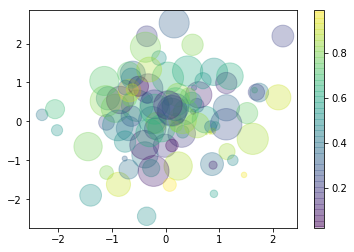

In [26]:
rng = np.random.RandomState(1)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,#transparency,
           cmap='viridis')
plt.colorbar()